In [78]:
#import Libraies
from keras.datasets import mnist
from tensorflow.keras import utils as np_utils
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D,GaussianNoise, Input, UpSampling2D
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [64]:
#load mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print data set
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [65]:
# Normalise pixel values by first converting float and divide by maximum pixel values
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255

In [19]:
#convert data into Categorical for that TF understands, there are 10 classes 0,1,2,3...9
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
#reshape train dataset and substract means 
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)


In [29]:
scaler = StandardScaler()
scaler.fit(x_train)
x_sc_train = scaler.transform(x_train)
x_sc_test = scaler.transform(x_test)

Text(0, 0.5, 'Cumulative explained variance')

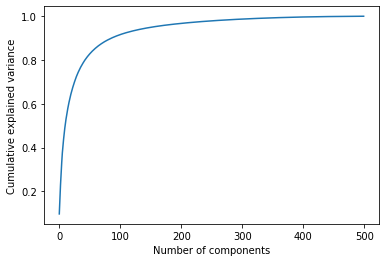

In [25]:
pca = PCA(n_components=500)
pca.fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [35]:
pca = PCA(n_components=100)
x_pca_train = pca.fit_transform(x_sc_train)
x_pca_test = pca.transform(x_sc_test)
pca_std = np.std(x_pca_train)

print(x_sc_train.shape)
print(x_pca_train.shape)

(60000, 784)
(60000, 100)


In [36]:
inv_pca = pca.inverse_transform(x_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

In [55]:
#sequential model
model = Sequential()
#desnse layer with 100 nodes
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(GaussianNoise(pca_std))
model.add(Dropout(0.1))
model.add(Dense(100, input_dim=100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [56]:
model.fit(x_pca_train, y_train, epochs=100, batch_size=32, validation_data=(x_pca_test, y_test), verbose=1)

Epoch 1/100
1875/1875 - 2s - loss: 0.6352 - accuracy: 0.8098 - val_loss: 0.2001 - val_accuracy: 0.9407
Epoch 2/100
1875/1875 - 2s - loss: 0.2932 - accuracy: 0.9134 - val_loss: 0.1667 - val_accuracy: 0.9514
Epoch 3/100
1875/1875 - 2s - loss: 0.2368 - accuracy: 0.9302 - val_loss: 0.1331 - val_accuracy: 0.9605
Epoch 4/100
1875/1875 - 2s - loss: 0.2076 - accuracy: 0.9407 - val_loss: 0.1198 - val_accuracy: 0.9656
Epoch 5/100
1875/1875 - 2s - loss: 0.1940 - accuracy: 0.9459 - val_loss: 0.1238 - val_accuracy: 0.9665
Epoch 6/100
1875/1875 - 2s - loss: 0.1804 - accuracy: 0.9502 - val_loss: 0.1224 - val_accuracy: 0.9667
Epoch 7/100
1875/1875 - 2s - loss: 0.1724 - accuracy: 0.9524 - val_loss: 0.1178 - val_accuracy: 0.9679
Epoch 8/100
1875/1875 - 2s - loss: 0.1659 - accuracy: 0.9551 - val_loss: 0.1178 - val_accuracy: 0.9705
Epoch 9/100
1875/1875 - 2s - loss: 0.1661 - accuracy: 0.9557 - val_loss: 0.1190 - val_accuracy: 0.9694
Epoch 10/100
1875/1875 - 2s - loss: 0.1621 - accuracy: 0.9578 - val_loss:

Epoch 80/100
1875/1875 - 2s - loss: 0.1487 - accuracy: 0.9738 - val_loss: 0.2418 - val_accuracy: 0.9760
Epoch 81/100
1875/1875 - 2s - loss: 0.1589 - accuracy: 0.9732 - val_loss: 0.2585 - val_accuracy: 0.9758
Epoch 82/100
1875/1875 - 2s - loss: 0.1544 - accuracy: 0.9736 - val_loss: 0.2352 - val_accuracy: 0.9734
Epoch 83/100
1875/1875 - 2s - loss: 0.1481 - accuracy: 0.9735 - val_loss: 0.2377 - val_accuracy: 0.9742
Epoch 84/100
1875/1875 - 2s - loss: 0.1512 - accuracy: 0.9739 - val_loss: 0.2522 - val_accuracy: 0.9745
Epoch 85/100
1875/1875 - 2s - loss: 0.1579 - accuracy: 0.9728 - val_loss: 0.2631 - val_accuracy: 0.9740
Epoch 86/100
1875/1875 - 2s - loss: 0.1484 - accuracy: 0.9743 - val_loss: 0.2555 - val_accuracy: 0.9756
Epoch 87/100
1875/1875 - 2s - loss: 0.1477 - accuracy: 0.9746 - val_loss: 0.2690 - val_accuracy: 0.9739
Epoch 88/100
1875/1875 - 2s - loss: 0.1539 - accuracy: 0.9749 - val_loss: 0.2160 - val_accuracy: 0.9766
Epoch 89/100
1875/1875 - 2s - loss: 0.1651 - accuracy: 0.9744 - 

In [73]:
#load mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print data set
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [74]:
#Images are of size 28x28 and images are gray scale, lets reshape arrays to have single color channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test  = x_test.reshape((x_test.shape[0], 28, 28, 1))
print(x_train.shape)

(60000, 28, 28, 1)


In [75]:
# Normalise pixel values by first converting float and divide by maximum pixel values
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255

In [76]:
#Encoder
encoder = Sequential()
encoder.add(Conv2D(16, (3, 3), activation='relu', padding='same',
                   input_shape=(28,28,1)))
encoder.add(MaxPooling2D((2, 2), padding='same'))
encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
encoder.add(MaxPooling2D((2, 2), padding='same'))
encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
encoder.add(MaxPooling2D((4, 4), padding='same'))
encoder.add(Conv2D(8, (1, 1), activation='sigmoid', padding='same'))

In [83]:
#decoder
decoder = Sequential()
decoder.add(Conv2D(8, (3, 3), activation='relu', padding='same',
                   input_shape=encoder.output_shape[1:]))
decoder.add(UpSampling2D((4, 4)))
decoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2D(16, (3, 3), activation='relu'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

In [84]:
#autoencoder
autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [87]:
autoencoder.fit(x_train, x_train, epochs=100,
                    batch_size=512,
                    shuffle=True,
                    validation_data=(x_test, x_test))

Epoch 1/100
118/118 [==============================] - 36s 307ms/step - loss: 0.3914 - val_loss: 0.3936
Epoch 2/100
118/118 [==============================] - 41s 351ms/step - loss: 0.3892 - val_loss: 0.3913
Epoch 3/100
118/118 [==============================] - 40s 341ms/step - loss: 0.3870 - val_loss: 0.3890
Epoch 4/100
118/118 [==============================] - 41s 348ms/step - loss: 0.3847 - val_loss: 0.3868
Epoch 5/100
118/118 [==============================] - 41s 344ms/step - loss: 0.3827 - val_loss: 0.3848
Epoch 6/100
118/118 [==============================] - 41s 345ms/step - loss: 0.3807 - val_loss: 0.3828
Epoch 7/100
118/118 [==============================] - 46s 391ms/step - loss: 0.3787 - val_loss: 0.3807
Epoch 8/100
118/118 [==============================] - 48s 406ms/step - loss: 0.3767 - val_loss: 0.3788
Epoch 9/100
118/118 [==============================] - 40s 339ms/step - loss: 0.3748 - val_loss: 0.3768
Epoch 10/100
118/118 [==============================] - 40s 342m

118/118 [==============================] - 54s 461ms/step - loss: 0.2946 - val_loss: 0.2955
Epoch 80/100
118/118 [==============================] - 54s 460ms/step - loss: 0.2943 - val_loss: 0.2951
Epoch 81/100
118/118 [==============================] - 52s 439ms/step - loss: 0.2940 - val_loss: 0.2948
Epoch 82/100
118/118 [==============================] - 53s 452ms/step - loss: 0.2937 - val_loss: 0.2945
Epoch 83/100
118/118 [==============================] - 54s 461ms/step - loss: 0.2934 - val_loss: 0.2942
Epoch 84/100
118/118 [==============================] - 55s 464ms/step - loss: 0.2931 - val_loss: 0.2939
Epoch 85/100
118/118 [==============================] - 55s 468ms/step - loss: 0.2928 - val_loss: 0.2936
Epoch 86/100
118/118 [==============================] - 56s 472ms/step - loss: 0.2925 - val_loss: 0.2933
Epoch 87/100
118/118 [==============================] - 56s 474ms/step - loss: 0.2922 - val_loss: 0.2930
Epoch 88/100
118/118 [==============================] - 56s 478ms/st